In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f_randomSample(r,c,n):
    totalPoints = len(r)
    idx = np.random.permutation(np.arange(totalPoints))
    idx = idx[:n]
    r2,c2 = [],[]
    for i in range(len(idx)):
        r2.append(r[idx[i]])
        c2.append(c[idx[i]])
    return r2,c2


In [683]:
r = np.arange(10)
c = np.arange(10)[::-1]
r2,c2 = f_randomSample(r,c,9)
print(r2,c2)

[4, 6, 8, 0, 9, 3, 5, 2, 1] [5, 3, 1, 9, 0, 6, 4, 7, 8]


In [4]:
r

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
c

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [6]:
def f_fitLine(r1,c1,r2,c2):
    p = np.array([1,1])
    A = np.array([[r1,1],[r2,1]])
    q = np.array([[c1],[c2]])
    if np.linalg.matrix_rank(A) == 2:
        p = np.linalg.inv(A).dot(q)
    a , b = p[0] , p[1]
    return a,b

In [7]:
r = np.arange(10)
c = np.arange(10)[::-1]
r2,c2 = f_randomSample(r,c,2)
a,b = f_fitLine(r2[0],c2[0],r2[1],c2[1])

/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [8]:
a,b

(array([-1.]), array([9.]))

In [9]:
c2

[9, 2]

In [53]:
def f_fitLine(r1,c1,r2,c2):
    p = np.array([1,1])
    A = np.array([[r1,1],[r2,1]])
    q = np.array([[c1],[c2]])
    if np.linalg.matrix_rank(A) == 2:
        p = np.linalg.inv(A).dot(q)
    a , b = p[0] , p[1]
    return a,b

In [54]:
r = np.arange(10)
c = np.arange(10)[::-1]
# r2,c2 = f_randomSample(r,c,2)
r2, c2 = [1, 5], [0,0]
a,b = f_fitLine(r2[0],c2[0],r2[1],c2[1])

In [55]:
a, b

(array([0.]), array([0.]))

In [56]:
def f_getConsistencyScore(r,c,th,a,b):
    score = 0
    for i in range(len(r)):
        squaredError = (a*r[i]+b - c[i])**2
        if squaredError < th:
            score += 1
    return score

In [626]:
def f_RANSACLine(E, first, second, third):
    E = E>0
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    best_a , best_b = 0 , 0
    maxScore = -1
    numIter = 50
    for iter in range(numIter):
        r2,c2 = f_randomSample(r,c,2)
        a,b = f_fitLine(r2[0],c2[0],r2[1],c2[1])
        score = f_getConsistencyScore(r,c,2,a,b)
        if score > maxScore and ((first - a)**2 >=50 or (second - a)**2 >=50 or (third - a)**2 >=50):
            maxScore = score
            best_a , best_b = a,b
    return best_a,best_b

In [782]:
def f_RANSACFiveLines(E):
    E = E>0
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    best_coord = [[0,0],[0,0],[0,0],[0,0]]
    maxScore = -1
    numIter = 100
    for iter in range(numIter):
        r2,c2 = f_randomSample(r,c,2)
        a,b = f_fitLine(r2[0],c2[0],r2[1],c2[1])
        score = f_getConsistencyScore(r,c,2,a,b)
        if score > maxScore:
            maxScore = score
            best_coord.append([a,b])
    return best_coord[len(best_coord)-5:len(best_coord)]

In [739]:
E = plt.imread(r'/home/vitalii/Downloads/road.png')

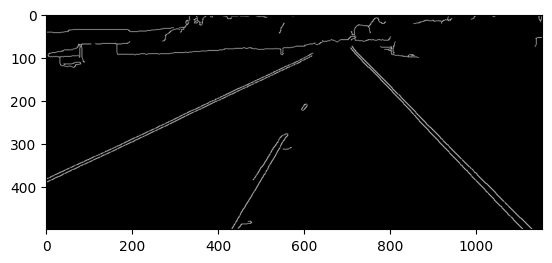

In [671]:
E = E[:,:,0]
plt.imshow(E,cmap='gray')

In [672]:
E.shape

(499, 1153)

In [673]:
E.max() , E.min()

(1.0, 0.0)

In [674]:
E.dtype

dtype('float32')

In [675]:
best_a, best_b = f_RANSACLine(E, 0, 0,0)
best_a, best_b


(array([-16.75]), array([1795.25]))

In [676]:
best_a1, best_b1 = f_RANSACLine(E, best_b, 0, 0)


best_a1, best_b1


(array([0.94488189]), array([635.1023622]))

In [677]:
best_a2, best_b2 = f_RANSACLine(E, best_b, best_b1, 0)
best_a2, best_b2

(array([0.99354839]), array([633.61290323]))

In [678]:
best_a3, best_b3 = f_RANSACLine(E, best_b, best_b1, best_b2)
best_a3, best_b3

(array([0.95934959]), array([631.]))

In [645]:
def f_getExtents(a,b,numRows,numCols):
    r1 = int(0)
    c1 = int(a*r1+b)
    r2 = int(numRows-1)
    c2 = int(a*r2+b)
    return (c1,r1),(c2,r2)

In [652]:
s,e = f_getExtents(best_a[0],best_b[0],E.shape[0],E.shape[1])
s1,e1 = f_getExtents(best_a1[0],best_b1[0],E.shape[0],E.shape[1])
s2,e2 = f_getExtents(best_a2[0],best_b2[0],E.shape[0],E.shape[1])
s3,e3 = f_getExtents(best_a3[0],best_b3[0],E.shape[0],E.shape[1])

In [653]:
s,e
s1,e1
s2,e2

((814, 0), (-244, 498))

In [654]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)

In [655]:
E.dtype

dtype('float32')

In [656]:
E3.dtype

dtype('uint8')

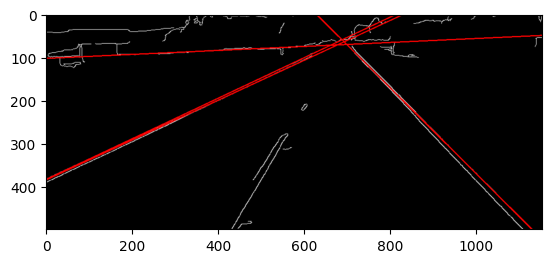

In [657]:
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2,s,e,(0,0,255),2)
I = cv2.line(E2,s1,e1,(0,0,255),2)
I = cv2.line(E2,s2,e2,(0,0,255),2)
I = cv2.line(E2,s3,e3,(0,0,255),2)
plt.imshow(I[:,:,::-1])

/tmp/ipykernel_6027/3738965244.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c1 = int(a*r1+b)
/tmp/ipykernel_6027/3738965244.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c2 = int(a*r2+b)


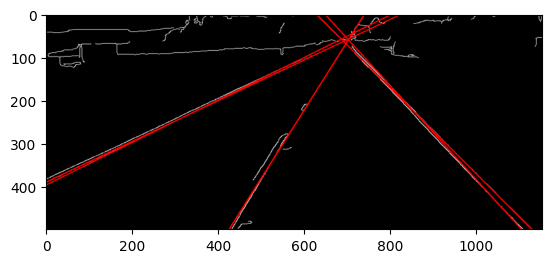

In [790]:
E = plt.imread(r'/home/vitalii/Downloads/road.png')
E = E[:,:,0]
plt.imshow(E,cmap='gray')
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)

best_coord = f_RANSACFiveLines(E)

s,e = f_getExtents(best_coord[0][0],best_coord[0][1],E.shape[0],E.shape[1])
s1,e1 = f_getExtents(best_coord[1][0],best_coord[1][1],E.shape[0],E.shape[1])
s2,e2 = f_getExtents(best_coord[2][0],best_coord[2][1],E.shape[0],E.shape[1])
s3,e3 = f_getExtents(best_coord[3][0],best_coord[3][1],E.shape[0],E.shape[1])
s4,e4 = f_getExtents(best_coord[4][0],best_coord[4][1],E.shape[0],E.shape[1])

E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2,s,e,(0,0,255),2)
I = cv2.line(E2,s1,e1,(0,0,255),2)
I = cv2.line(E2,s2,e2,(0,0,255),2)
I = cv2.line(E2,s3,e3,(0,0,255),2)
I = cv2.line(E2,s4,e4,(0,0,255),2)
plt.imshow(I[:,:,::-1])

In [791]:
def f_fitCircle(x1,y1,x2,y2,x3,y3):
    c = (x1-x2)**2 + (y1-y2)**2
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
    return px,py,r

In [792]:
def f_getConsistencyScore_circle(r,c,th,cr,cc,d):
    score = 0
    for i in range(len(r)):
        sd = ((r[i]-cr)**2 + (c[i]-cc)**2 - d**2)**2
        if sd < th:
            score += 1
    return score

In [793]:
def f_RANSACCircle(E):
    E = E>0
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    best_cr , best_cc , best_d = 0 , 0 , 0
    maxScore = -1
    numIter = 2000
    for iter in range(numIter):
        r2,c2 = f_randomSample(r,c,3)
        cr,cc,d = f_fitCircle(r2[0],c2[0],r2[1],c2[1],r2[2],c2[2])
        score = f_getConsistencyScore_circle(r,c,3,cr,cc,d)
        if score > maxScore:
            maxScore = score
            best_cr , best_cc , best_d = cr , cc , d
    return best_cr , best_cc , best_d

In [799]:
E = cv2.imread(r'/home/vitalii/Downloads/Ec.png',cv2.IMREAD_GRAYSCALE)

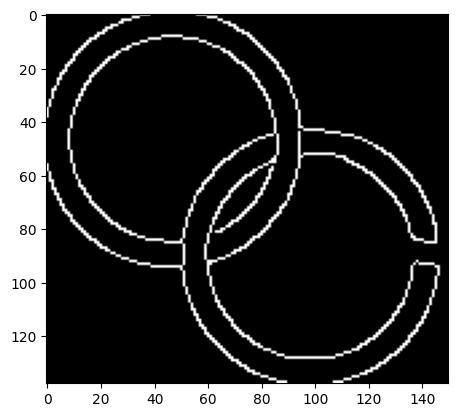

In [800]:
plt.imshow(E,cmap='gray')

In [801]:
E.shape

(138, 150)

In [802]:
E.max(),E.min()

(255, 0)

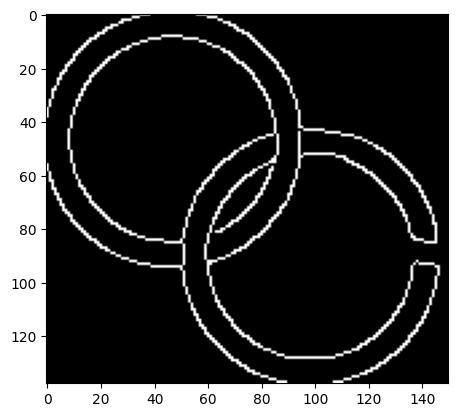

In [803]:
E = E>100
plt.imshow(E,cmap='gray')

In [804]:
best_cr,best_cc,best_d = f_RANSACCircle(E)

/tmp/ipykernel_6027/542909876.py:6: RuntimeWarning: invalid value encountered in scalar divide
  px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
/tmp/ipykernel_6027/542909876.py:7: RuntimeWarning: invalid value encountered in scalar divide
  py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s


In [805]:
best_cr,best_cc,best_d

(46.436898395721926, 46.526737967914436, 48.15160873744633)

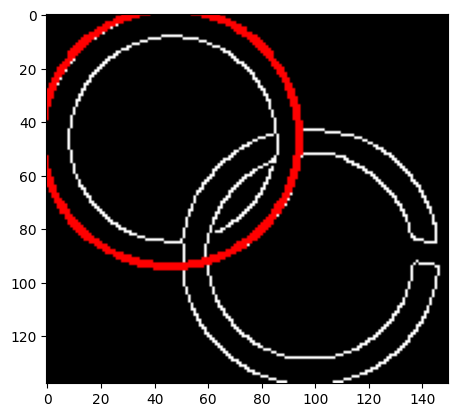

In [806]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])